In [ ]:
!pip install kaggle
 
import glob
import zipfile
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
 
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
 
!kaggle datasets download -d corrieaar/apartment-rental-offers-in-germany
 
 
 
file = glob.glob('*.zip')[0]
with zipfile.ZipFile(file, 'r') as zip_ref:
  zip_ref.extractall('files')

Saving kaggle.json to kaggle (3).json
apartment-rental-offers-in-germany.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import scipy
import warnings
import itertools
import numpy as np
import scipy.stats
import scipy.linalg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.kernel_approximation import Nystroem
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

sns.set()
warnings.filterwarnings('ignore')

In [ ]:
class SimpleLinearRegression:
  def __init__(self):
    self.sol_ = None
  def fit(self, X, y):
    Xhat = np.hstack((np.ones((X.shape[0],1)), X))
    p, res, rnk, s = scipy.linalg.lstsq(Xhat, y)
    self.sol_ = p
    return self
  def predict(self, X):
    Xhat = np.hstack((np.ones((X.shape[0],1)), X))
    return np.dot(Xhat, self.sol_)
  

In [ ]:
def onehot_encode(df, column):    
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column, dtype=bool)
    df = pd.concat([dummies, df], axis=1)
    df = df.drop([column], axis=1)   
    return df 

In [ ]:
dfmain = pd.read_csv('files/immo_data.csv')



dfmain.noRooms = dfmain.noRooms.astype(int)
dfmain.loc[dfmain.floor.isnull(), 'floor'] = 0

dfmain = dfmain[dfmain.livingSpace.between(20, 140, inclusive=True)]
dfmain = dfmain[dfmain.baseRent.between(0, 5000, inclusive=True)]
dfmain = dfmain[dfmain.noRooms.between(1, 7, inclusive=True)]
dfmain = dfmain[dfmain.totalRent.between(0, 6000, inclusive=True)  | dfmain.totalRent.isnull()]
dfmain = dfmain[dfmain.serviceCharge.between(0, 1000, inclusive=True)  | dfmain.serviceCharge.isnull()]
dfmain = dfmain[dfmain.floor.between(0, 12, inclusive=True) | dfmain.floor.isnull()]
dfmain = dfmain[dfmain.heatingCosts.between(0, 1000, inclusive=True) | dfmain.heatingCosts.isnull()]
dfmain = dfmain[dfmain.yearConstructed.between(1850, 2020, inclusive=True) | dfmain.yearConstructed.isnull()]

print(dfmain.shape)


dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==1].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.serviceCharge.isnull(), 'serviceCharge'] = dfmain[dfmain.livingSpaceRange==1].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==1].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==1].heatingType.mode().iloc[0]


indx = dfmain[dfmain.livingSpaceRange==1].totalRent.isnull()
srvchrg = dfmain[dfmain.livingSpaceRange==1].serviceCharge[indx]
bserent = dfmain[dfmain.livingSpaceRange==1].baseRent[indx]
htgcost = dfmain[dfmain.livingSpaceRange==1].heatingCosts[indx]
dfmain.totalRent[dfmain.livingSpaceRange==1 & dfmain.totalRent.isnull()].fillna(srvchrg + bserent + htgcost,inplace=True)


dfmain = dfmain[dfmain.livingSpace.between(20, 140, inclusive=True)]
dfmain = dfmain[dfmain.baseRent.between(0, 5000, inclusive=True)]
dfmain = dfmain[dfmain.noRooms.between(1, 7, inclusive=True)]
dfmain = dfmain[dfmain.totalRent.between(0, 6000, inclusive=True)  | dfmain.totalRent.isnull()]
dfmain = dfmain[dfmain.serviceCharge.between(0, 1000, inclusive=True)  | dfmain.serviceCharge.isnull()]
dfmain = dfmain[dfmain.floor.between(0, 12, inclusive=True) | dfmain.floor.isnull()]
dfmain = dfmain[dfmain.heatingCosts.between(0, 1000, inclusive=True) | dfmain.heatingCosts.isnull()]
dfmain = dfmain[dfmain.yearConstructed.between(1850, 2020, inclusive=True) | dfmain.yearConstructed.isnull()]

print(dfmain.shape)


dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==1].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.serviceCharge.isnull(), 'serviceCharge'] = dfmain[dfmain.livingSpaceRange==1].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==1].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==1) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==1].heatingType.mode().iloc[0]


indx = dfmain[dfmain.livingSpaceRange==1].totalRent.isnull()
srvchrg = dfmain[dfmain.livingSpaceRange==1].serviceCharge[indx]
bserent = dfmain[dfmain.livingSpaceRange==1].baseRent[indx]
htgcost = dfmain[dfmain.livingSpaceRange==1].heatingCosts[indx]
dfmain.totalRent[dfmain.livingSpaceRange==1 & dfmain.totalRent.isnull()].fillna(srvchrg + bserent + htgcost,inplace=True)


dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.picturecount.between(0, 15, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.baseRent.between(0, 550, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.baseRentRange.between(0, 3, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.livingSpace.between(15, 50, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.noRooms.between(1, 2, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.serviceCharge.between(0, 160, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.floor.between(0, 7, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.heatingCosts.between(10, 70, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.yearConstructed.between(1930, 2020, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]

print(dfmain.shape)


dfmain = dfmain[
                ((dfmain.livingSpaceRange==1) &
                (dfmain.totalRent.between(50, 690, inclusive=True))) | (dfmain.livingSpaceRange!=1)
                ]
print('end1', dfmain.shape)







dfmain.loc[(dfmain.livingSpaceRange==2) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==2].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==2) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==2].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==2) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==2].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==2) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==2].heatingType.mode().iloc[0]

indx = dfmain[dfmain.livingSpaceRange==2].totalRent.isnull()
srvchrg = dfmain[dfmain.livingSpaceRange==2].serviceCharge[indx]
bserent = dfmain[dfmain.livingSpaceRange==2].baseRent[indx]
htgcost = dfmain[dfmain.livingSpaceRange==2].heatingCosts[indx]
dfmain.totalRent[dfmain.livingSpaceRange==2 & dfmain.totalRent.isnull()].fillna(srvchrg + bserent + htgcost,inplace=True)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.picturecount.between(0, 25, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.baseRentRange.between(0, 3, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.baseRent.between(110, 550, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.noRooms.between(1, 3, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.totalRent.between(200, 720, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.serviceCharge.between(0, 200, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.floor.between(0, 7, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.heatingCosts.between(15, 115, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==2) &
                (dfmain.yearConstructed.between(1920, 2020, inclusive=True))) | (dfmain.livingSpaceRange!=2)
                ]
print(dfmain.shape)







dfmain.loc[(dfmain.livingSpaceRange==3) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==3].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==3) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==3].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==3) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==3].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==3) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==3].heatingType.mode().iloc[0]


dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.picturecount.between(0, 30, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.baseRent.between(50, 1000, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.noRooms.between(2, 4, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.totalRent.between(100, 1100, inclusive=True))) | (dfmain.livingSpaceRange!=3)
]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.serviceCharge.between(0, 270, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.floor.between(0, 8, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.heatingCosts.between(20, 170, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==3) &
                (dfmain.yearConstructed.between(1890, 2020, inclusive=True))) | (dfmain.livingSpaceRange!=3)
                ]
print(dfmain.shape)








dfmain.loc[(dfmain.livingSpaceRange==4) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==4].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==4) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==4].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==4) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==4].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==4) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==4].heatingType.mode().iloc[0]

dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.picturecount.between(0, 35, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.baseRent.between(100, 1500, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.baseRentRange.between(2, 5, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.noRooms.between(2, 4, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.totalRent.between(100, 1800, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.serviceCharge.between(30, 350, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.floor.between(0, 8, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.heatingCosts.between(30, 180, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==4) &
                (dfmain.yearConstructed.between(1850, 2020, inclusive=True))) | (dfmain.livingSpaceRange!=4)
                ]  
print(dfmain.shape)







dfmain.loc[(dfmain.livingSpaceRange==5) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==5].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==5) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==5].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==5) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==5].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==5) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==5].heatingType.mode().iloc[0]

dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.picturecount.between(0, 40, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)

dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.baseRent.between(200, 1900, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.baseRentRange.between(4, 8, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.noRooms.between(2, 5, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.totalRent.between(150, 2300, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.serviceCharge.between(30, 420, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.floor.between(0, 5, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==5) &
                (dfmain.heatingCosts.between(25, 200, inclusive=True))) | (dfmain.livingSpaceRange!=5)
                ]                
print(dfmain.shape)






dfmain.loc[(dfmain.livingSpaceRange==6) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==6].serviceCharge.mean()
dfmain.loc[(dfmain.livingSpaceRange==6) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==6].heatingCosts.mean()
dfmain.loc[(dfmain.livingSpaceRange==6) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==6].petsAllowed.mode().iloc[0]
dfmain.loc[(dfmain.livingSpaceRange==6) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==6].heatingType.mode().iloc[0]
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.baseRent.between(200, 2300, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.picturecount.between(0, 45, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.baseRentRange.between(5, 8, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.floor.between(0, 4, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.noRooms.between(3, 5, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.totalRent.between(250, 2650, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.serviceCharge.between(35, 470, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]
print(dfmain.shape)
dfmain = dfmain[
                ((dfmain.livingSpaceRange==6) &
                (dfmain.heatingCosts.between( 130, 130.5, inclusive=True))) | (dfmain.livingSpaceRange!=6)
                ]  
print(dfmain.shape)              









# dfmain.loc[(dfmain.livingSpaceRange==7) & dfmain.serviceCharge.isnull(),'serviceCharge'] = dfmain[dfmain.livingSpaceRange==7].serviceCharge.mean()
# dfmain.loc[(dfmain.livingSpaceRange==7) & dfmain.heatingCosts.isnull(), 'heatingCosts'] = dfmain[dfmain.livingSpaceRange==7].heatingCosts.mean()
# dfmain.loc[(dfmain.livingSpaceRange==7) & dfmain.petsAllowed.isnull(), 'petsAllowed'] = dfmain[dfmain.livingSpaceRange==7].petsAllowed.mode().iloc[0]
# dfmain.loc[(dfmain.livingSpaceRange==7) & dfmain.heatingType.isnull(), 'heatingType'] = dfmain[dfmain.livingSpaceRange==7].heatingType.mode().iloc[0]

# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.baseRent.between(0, 50, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)

# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.floor.between(0, 4, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.baseRentRange.between(6, 9, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)                
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.livingSpace.between(0, 210, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)                
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.baseRent.between(0, 3100, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)                
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.livingSpace.between(10, 230, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.noRooms.between(3, 6, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.totalRent.between(300, 4100, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.serviceCharge.between(10, 620, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]
# print(dfmain.shape)
# dfmain = dfmain[
#                 ((dfmain.livingSpaceRange==7) &
#                 (dfmain.heatingCosts.between(173, 174, inclusive=True))) | (dfmain.livingSpaceRange!=7)
#                 ]  
# print(dfmain.shape)


# REMOVE LUXURY HOUSES
dfmain = dfmain[dfmain.livingSpaceRange!=7]

print(dfmain.shape)

(255238, 49)
(255238, 49)
(253505, 49)
(250955, 49)
(250343, 49)
(250343, 49)
(250288, 49)
(250012, 49)
(249757, 49)
(249307, 49)
(242008, 49)
end1 (240158, 49)
(239419, 49)
(225678, 49)
(225637, 49)
(225558, 49)
(216872, 49)
(216527, 49)
(216199, 49)
(215328, 49)
(197286, 49)
(196776, 49)
(192247, 49)
(191696, 49)
(178297, 49)
(177939, 49)
(177628, 49)
(176969, 49)
(163384, 49)
(163146, 49)
(161299, 49)
(144968, 49)
(140724, 49)
(140668, 49)
(140610, 49)
(140394, 49)
(135443, 49)
(135341, 49)
(134447, 49)
(133561, 49)
(130341, 49)
(130218, 49)
(130039, 49)
(129911, 49)
(129368, 49)
(129327, 49)
(128276, 49)
(127849, 49)
(126375, 49)
(126310, 49)
(120080, 49)
(120080, 49)


In [ ]:
heatingTypeRequired = [
    'central_heating', 'district_heating', 'gas_heating',
    'self_contained_central_heating', 'floor_heating'
]

petMapping = {'no': False, 'yes':True, 'negotiable':True, None: False}

regio1Required = ['Sachsen_Anhalt','Baden_Württemberg','Hessen','Berlin',
                  'Nordrhein_Westfalen','Sachsen','Schleswig_Holstein',
                  'Rheinland_Pfalz','Bayern','Niedersachsen','Brandenburg',
                  'Thüringen','Mecklenburg_Vorpommern']

In [ ]:
def get_df(cols):
  df = dfmain[cols].copy()

  if 'petsAllowed' in cols:
    df.petsAllowed.replace(petMapping, inplace=True)

  df = df[df.regio1.isin(regio1Required)]

  df.loc['livingSpace'] = df.livingSpace.round(0)

  if 'baseRent' in cols:
    df.loc['baseRent'] = df.baseRent.round(1)


  if 'regio1' in cols:
    df = onehot_encode(df,'regio1')

  # if 'baseRentRange' in list(df):
  #   df = onehot_encode(df,'baseRentRange')

  if 'heatingType' in cols:
    df = df[df.heatingType.isin(heatingTypeRequired)]
    df = onehot_encode(df,'heatingType')
  df.dropna(inplace=True)
  return df

In [ ]:
vars = ['regio1', 'heatingType', 'petsAllowed']

columns = dfmain.corr()['livingSpace'].sort_values(ascending=False).round(2)

columns = columns.loc[~columns.isnull() & (columns>=0.2)]
columns = list(dict(columns).keys())
columns.extend(vars)
columns.remove('livingSpace')
columns.append('livingSpace')
# print(len(columns), columns)

i = 3
df = get_df(columns)

tmp1 = df[df.livingSpaceRange < i]
tmp2 = df[df.livingSpaceRange >=i]

In [ ]:
def mean_epsilon_insensitive(y, p, epsilon):
  ret = np.fabs(y - p) - epsilon
  return np.maximum(0, ret).sum()/len(y)

In [ ]:
def predict1(df):
  X = df.iloc[:, :-1].to_numpy()
  y = df.iloc[:, -1].to_numpy()

  feature_map = Nystroem(n_components=1000,
                        kernel='rbf',                        
                        gamma=0.0000008,
                        random_state=1)

  PhiX = feature_map.fit_transform(X)
  

  Xtrain, Xtest, ytrain, ytest = train_test_split(PhiX, y, random_state=1)

  reg = LinearRegression() # SimpleLinearRegression()
  reg.fit(Xtrain, ytrain)
  # r2 = reg.score(Xtest, ytest)
  ypred = reg.predict(Xtest)
  return mean_absolute_error(ytest, ypred), mean_squared_error(ytest, ypred), mean_epsilon_insensitive(ytest, ypred, 1), ypred,ytest


def predict2(df):

  X = df.iloc[:, :-1].to_numpy()
  y = df.iloc[:, -1].to_numpy()

  feature_map = Nystroem(n_components=500,
                        kernel='poly',
                        degree=3,
                        gamma=0.00001,
                        random_state=1)
  
  PhiX = feature_map.fit_transform(X)
  # PhiX = X
  PhiX = StandardScaler().fit_transform(PhiX)
  Xtrain, Xtest, ytrain, ytest = train_test_split(PhiX, y, random_state=1,)

  reg = LinearRegression() # SimpleLinearRegression()
  reg.fit(Xtrain, ytrain)
  # r2 = reg.score(Xtest, ytest)
  ypred = reg.predict(Xtest)
  return mean_absolute_error(ytest, ypred),mean_squared_error(ytest, ypred), mean_epsilon_insensitive(ytest, ypred, 1), ypred,ytest


In [ ]:
mae1,mse1,eps1,ypred1,ytest1 = predict1(tmp1)
mae2,mse2,eps2,ypred2,ytest2 = predict2(tmp2)
mae,mse,eps, ypred,ytest = predict1(df)

print(round(mae1, 2),round(mse1, 2), round(eps1, 2))
print(round(mae2, 2),round(mse2, 2),round(eps2, 2))
print(round((mae1 + mae2 ) / 2, 2), round((mse1 + mse2 ) / 2, 2), round((eps1 + eps2 ) / 2, 2))
print(round(mae, 2),round(mse, 2),round(eps, 2))

3.24 17.38 2.35
4.1 24.83 3.17
3.67 21.11 2.76
3.81 22.28 2.89


In [ ]:
conf = 0.15
n_true1 = np.logical_and((ytest1*(1-conf)) <= ypred1, ypred1 <= (ytest1*(1+conf))).sum()
print(round(n_true1/len(ytest1)*100,2))

conf = 0.15
n_true2 = np.logical_and((ytest2*(1-conf)) <= ypred2, ypred2 <= (ytest2*(1+conf))).sum()
print(round(n_true2/len(ytest2)*100,2))


print(round(
    (n_true2/len(ytest2) + n_true1/len(ytest1))/2
    *100
    ,2))

n_true = np.logical_and((ytest*(1-conf)) <= ypred, ypred <= (ytest*(1+conf))).sum()
print(round(n_true/len(ytest)*100,2))

88.48
99.03
93.76
95.01


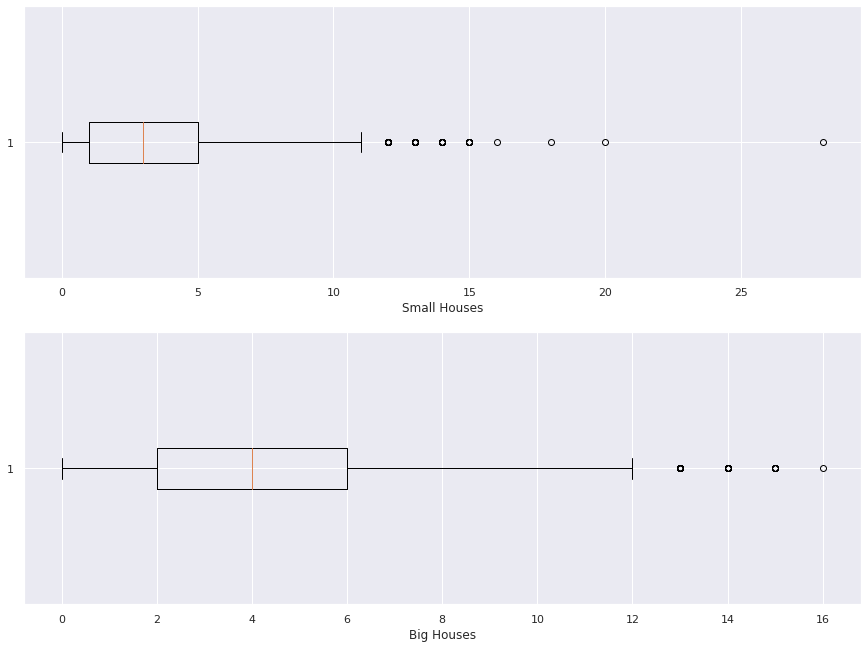

In [ ]:
dif = np.abs(ypred1 - ytest1).round()
fig, axs = plt.subplots(2, 1, figsize=(15, 11))
axs[0].boxplot(dif, vert=False)
axs[0].set_xlabel('Small Houses')
dif = np.abs(ypred2 - ytest2).round()
axs[1].boxplot(dif, vert=False)
axs[1].set_xlabel('Big Houses')
# sns.violinplot(x = dif,ax=ax)
None

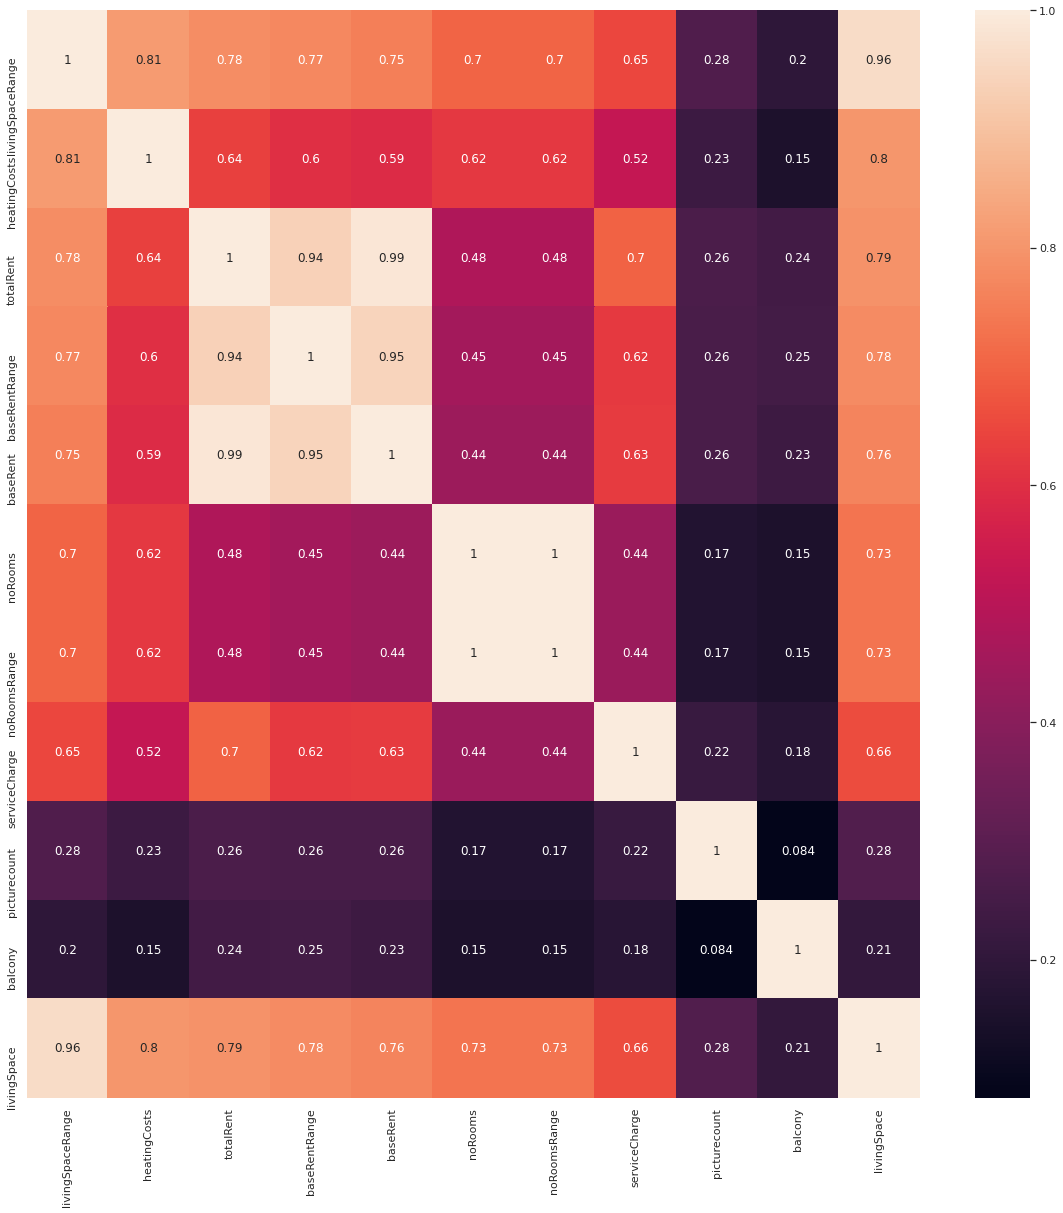

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(20,20))
corr_matrix = dfmain[columns].corr()
sns.heatmap(corr_matrix, annot=True,ax=ax)
None

In [ ]:
# print('Gaussian Probably check:\n')

# for col in set(columns) - set(vars):  
#   stat, p = scipy.stats.shapiro(df[col])
#   if p > 0.05:
#     print('%-20s: +' % col)
#   else:
#     print('%-16s: -' % col)

In [ ]:
scaled_df = StandardScaler().fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns = list(df))

In [ ]:
print('Gaussian Probably check:\n')

for col in set(columns) - set(vars):  
  stat, p = scipy.stats.normaltest(scaled_df[col])
  if p > 0.05:
    print('%-16s: +' % col)
  else:
    print('%-16s: -' % col)

Gaussian Probably check:

balcony         : -
heatingCosts    : -
livingSpace     : -
noRoomsRange    : -
totalRent       : -
livingSpaceRange: -
serviceCharge   : -
baseRent        : -
noRooms         : -
baseRentRange   : -
picturecount    : -


In [ ]:
print('Independency check:\n')
for c1,c2 in itertools.combinations(vars,2):
  contingency_table=pd.crosstab(dfmain[c1],dfmain[c2])
  stat, p, dof, expected = scipy.stats.chi2_contingency(contingency_table)
  if p > 0.05:
    print('%-12s, %-10s: +' % (c1, c2))
  else:
    print('%-12s, %-10s: -' % (c1, c2))

Independency check:

regio1      , heatingType: -
regio1      , petsAllowed: -
heatingType , petsAllowed: -


In [ ]:
print('ANOVA check:\n +: the same distribution\n-:different distributions')
v = [* vars, 'picturecount','noRoomsRange', 'baseRentRange'] 
for c in itertools.combinations(list(set(columns) - set(v)),2):
    stat, p = scipy.stats.f_oneway(*[scaled_df[_] for _ in c])
    if p > 0.05:
      print('%s,%s,+' % c)
    else:
      print('%s,%s,-' % c)

ANOVA check:
 +: the same distribution
-:different distributions
balcony,heatingCosts,+
balcony,livingSpace,+
balcony,totalRent,+
balcony,serviceCharge,+
balcony,baseRent,+
balcony,noRooms,+
balcony,livingSpaceRange,-
heatingCosts,livingSpace,+
heatingCosts,totalRent,+
heatingCosts,serviceCharge,+
heatingCosts,baseRent,+
heatingCosts,noRooms,+
heatingCosts,livingSpaceRange,+
livingSpace,totalRent,+
livingSpace,serviceCharge,+
livingSpace,baseRent,+
livingSpace,noRooms,+
livingSpace,livingSpaceRange,+
totalRent,serviceCharge,+
totalRent,baseRent,+
totalRent,noRooms,+
totalRent,livingSpaceRange,+
serviceCharge,baseRent,+
serviceCharge,noRooms,+
serviceCharge,livingSpaceRange,+
baseRent,noRooms,+
baseRent,livingSpaceRange,+
noRooms,livingSpaceRange,+


In [ ]:
# i,j = 0,0
# f, axs = plt.subplots(4,2,figsize=(15,26))
# for col in ['baseRent', 'livingSpace','totalRent','serviceCharge','floor','heatingCosts', 'yearConstructed', 'picturecount']:
#   dfmain[dfmain.livingSpaceRange==1][col].plot(kind='box', ax=axs[i,j])
#   i+=1
#   if i>3:
#     j+=1
#     i=0
  
# i

# i=1

# dfmain[dfmain.livingSpaceRange==i].noRooms.value_counts()
# print(dfmain[dfmain.livingSpaceRange==i].floor.value_counts())
# dfmain[dfmain.livingSpaceRange==i].baseRent.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].livingSpace.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].totalRent.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].serviceCharge.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].floor.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].heatingCosts.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].yearConstructed.plot(kind='box')
# dfmain[dfmain.livingSpaceRange==i].serviceCharge.isnull().sum()
# dfmain[dfmain.livingSpaceRange==i].floor.value_counts()
# dfmain[dfmain.livingSpaceRange==i].picturecount.plot(kind='box')

# dfmain[dfmain.livingSpaceRange==i].baseRentRange.value_counts()

# for k, v in dict(dfmain[vars[2]].value_counts()).items():
#   print("'%s', '%d'" % (k,v))